# Agents: demonstrating learning to navigate an environment

This notebook demonstrates a number of approaches to training and agent to act in an environment. Much of the code used here is generated with the help of my good friend Claude (`https://claude.ai/`).

Let's investigate agents, affect, and coding with Claude!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from active_inference_agent import ActiveInferenceAgent
# from reinforcement_agent
# from affect_agent

from environ import Environment

In [2]:
def run_simulation(env_size=10, n_steps=500):
    env = Environment(env_size)
    agent = ActiveInferenceAgent(env_size)
    
    states = []
    beliefs = []
    resource_levels = []

    state = env.reset()
    agent.agent_pos = state
    for _ in range(n_steps):
        states.append(state)
        beliefs.append(agent.beliefs.copy())
        resource_levels.append(agent.resource_levels.copy())

        action = agent.act()
        prev_state = state
        state, resources = env.step(action)
        agent.agent_pos = state
        agent.update_beliefs(state, resources)
        agent.update_model(prev_state, action, state)
        agent.update_resources(resources)

    return np.array(states), np.array(beliefs), np.array(resource_levels), env.grid, env.obstacles

In [3]:
def visualize_simulation(states, beliefs, resource_levels, final_grid, obstacles):
    fig, axes = plt.subplots(2, 3, figsize=(13, 9))
    
    # Plot agent's position over time
    axes[0, 0].plot(states[:, 0], states[:, 1], 'b-', alpha=0.5)
    axes[0, 0].plot(states[0, 0], states[0, 1], 'go', label='Start')
    axes[0, 0].plot(states[-1, 0], states[-1, 1], 'ro', label='End')
    axes[0, 0].imshow(obstacles, cmap='binary', alpha=0.3)
    axes[0, 0].imshow(np.sum(final_grid, axis=2), cmap='YlOrRd', alpha=0.5)
    axes[0, 0].set_title('Agent Movement')
    axes[0, 0].legend()
    
    # Plot resource levels over time
    axes[0, 1].plot(resource_levels[:, 0], label='Resource 1')
    axes[0, 1].plot(resource_levels[:, 1], label='Resource 2')
    axes[0, 1].set_title('Resource Levels')
    axes[0, 1].set_xlabel('Time Step')
    axes[0, 1].set_ylabel('Resource Level')
    axes[0, 1].legend()
    
    # Plot final belief distribution for resource 1
    im1 = axes[1, 0].imshow(beliefs[-1, :, :, 0], cmap='viridis')
    axes[1, 0].set_title('Final Belief Distribution (Resource 1)')
    plt.colorbar(im1, ax=axes[1, 0])
    
    # Plot final belief distribution for resource 2
    im2 = axes[1, 1].imshow(beliefs[-1, :, :, 1], cmap='viridis')
    axes[1, 1].set_title('Final Belief Distribution (Resource 2)')
    plt.colorbar(im2, ax=axes[1, 1])
    
    # Plot final resource distribution
    im3 = axes[0, 2].imshow(np.sum(final_grid, axis=2), cmap='YlOrRd')
    axes[0, 2].set_title('Final Resource Distribution')
    plt.colorbar(im3, ax=axes[0, 2])
    
    # Plot obstacles
    im4 = axes[1, 2].imshow(obstacles, cmap='binary')
    axes[1, 2].set_title('Obstacles')
    plt.colorbar(im4, ax=axes[1, 2])
    
    plt.tight_layout()
    plt.show()

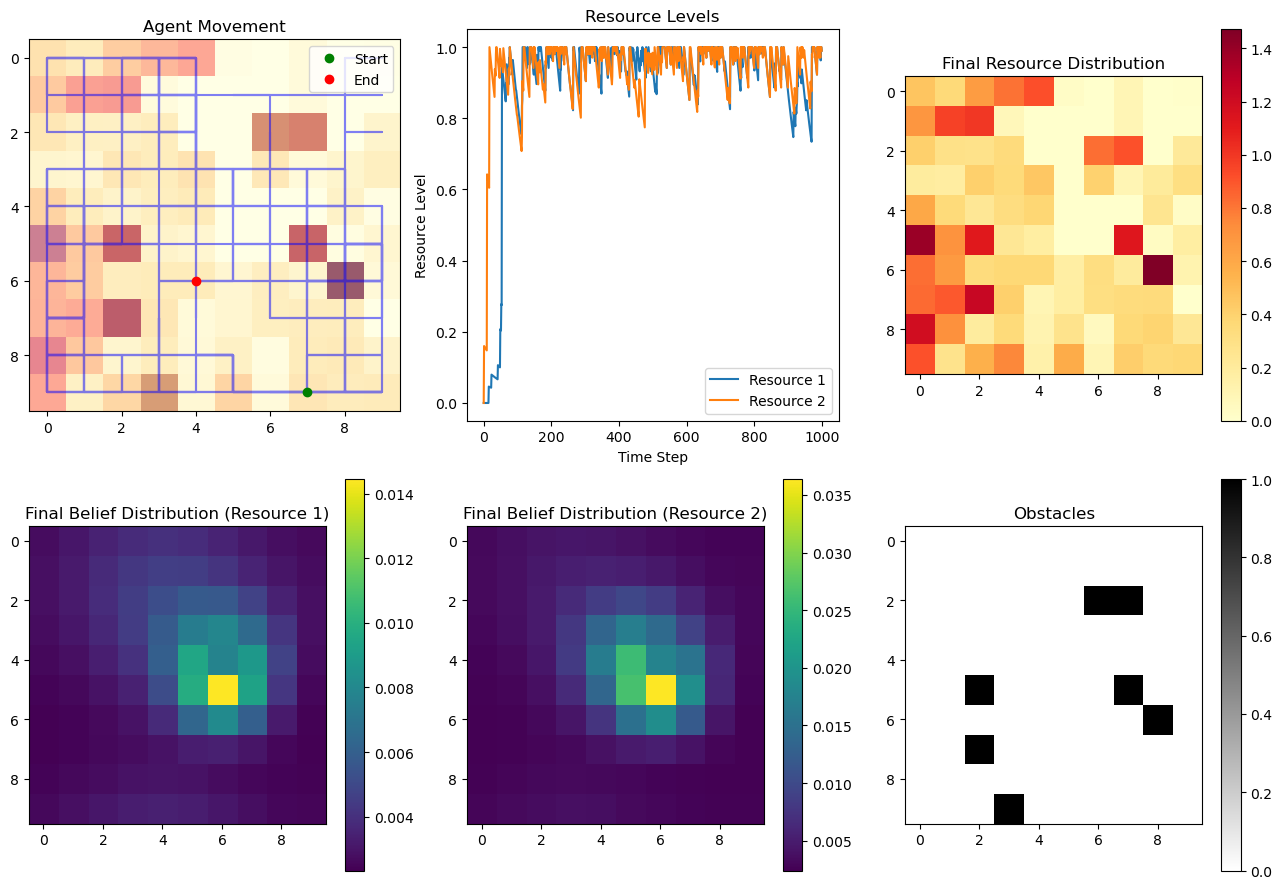

In [4]:
# Run the simulation and visualize the results
env_size = 10
n_steps = 1000
states, beliefs, resource_levels, final_grid, obstacles = run_simulation(env_size, n_steps)
visualize_simulation(states, beliefs, resource_levels, final_grid, obstacles)